In [2]:
# Python
import numpy as np
import pandas as pd
from prophet import Prophet
from scipy import stats
from prophet.plot import plot_yearly

Importing plotly failed. Interactive plots will not work.


In [3]:
try:
    df = pd.read_csv('/Users/chris/Documents/UR/SENIOR/FinalSemester/CSC260/Final_Project/pmn_data.csv')
except:
    print("well that didn't work...")

In [4]:
Location_1 = 'TX - Drum Bay'
Location_2 = 'TX — TX - Port O\'Connor Fishing Pier'
Location_3 = 'TX - Jims Pier'
Location_4 = 'TX - Bastrop Bay'
Location_5 = 'Windsurfing Flats Bay Access 2,26.14342'

Plankton = ['Coscinodiscus morphotype','Pseudo-nitzschia spp.','Odontella spp.']
LocationList = [Location_1,Location_2,Location_3,Location_4,Location_5]
print(df['spec_name'].mode()) # Coscinodiscus morphotype is the modal phytoplankton with 1482 samples
frames = []
prophetList = []
concatenated = []

for p in Plankton:  
    frames = []
    for loc in LocationList:
        frame = df.loc[(df['sampl_site'] == loc) &  (df['spec_name'] == p)]
        frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
        frames.append(frame)
    Texas = pd.concat(frames)
    concatenated.append(Texas)




0    Coscinodiscus morphotype
Name: spec_name, dtype: object


/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/533488407.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/533488407.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]
/var/folders/0s/40sd363j3hv3vw2_9nmxhrrh0000gn/T/ipykernel_20596/533488407.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame = frame[(np.abs(stats.zscore(df['y'])) < 3)]


In [5]:
for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = Prophet()
    p.fit(dataFrame)
    prophetList.append(p)

13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:21 - cmdstanpy - INFO - Chain [1] done processing
13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:21 - cmdstanpy - INFO - Chain [1] done processing
13:51:21 - cmdstanpy - INFO - Chain [1] start processing
13:51:22 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
futures = []
for p in prophetList:
    future = p.make_future_dataframe(periods=365)
    future.tail()
    futures.append(future)

In [7]:
forecasts = []
for i in range(len(prophetList)):
    forecast = prophetList[i].predict(futures[i])
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    forecasts.append(forecast)

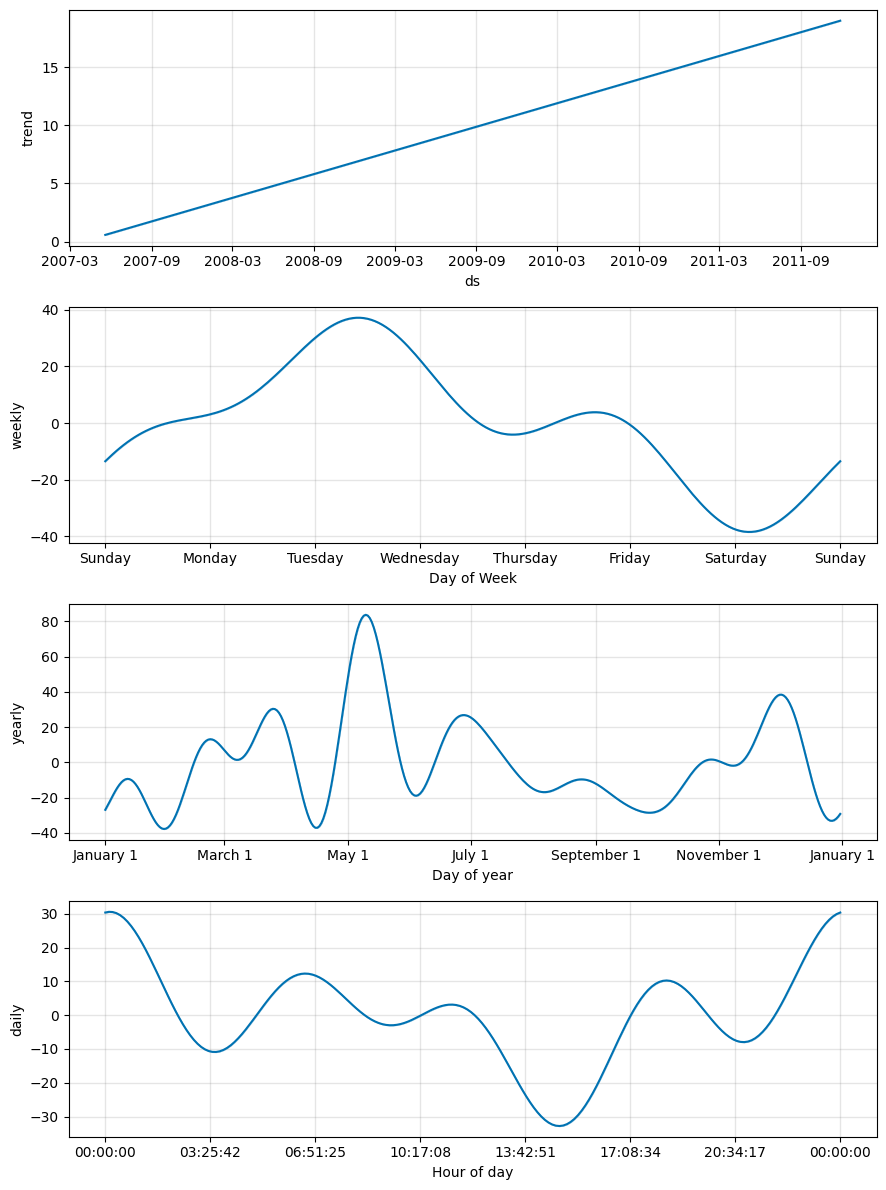

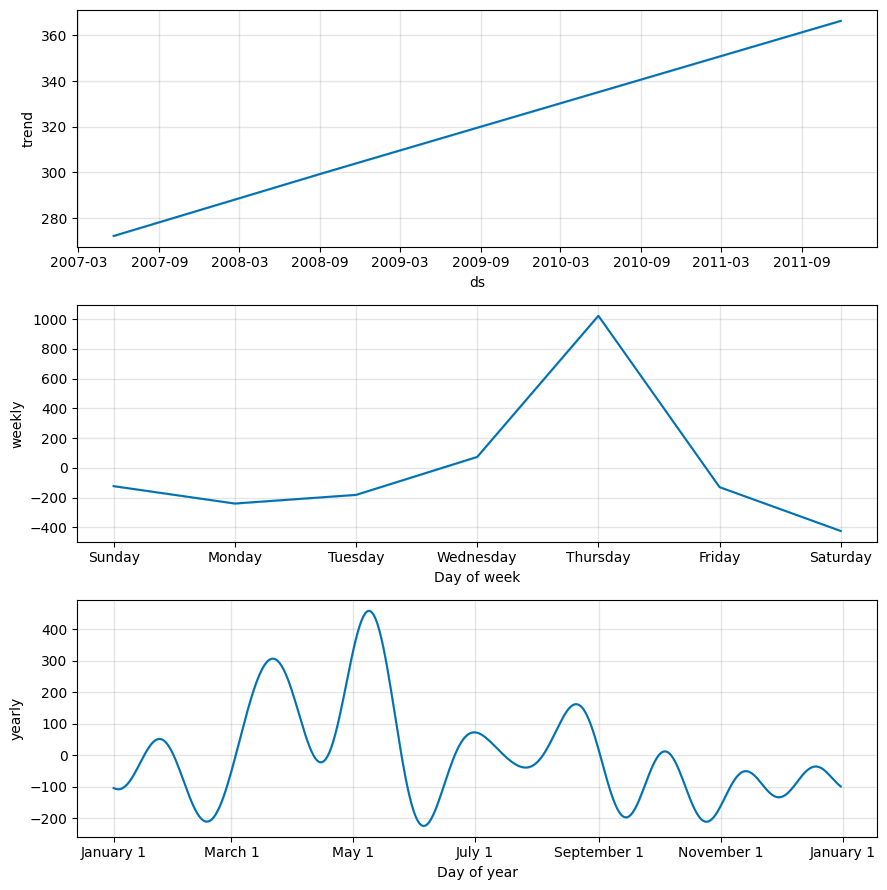

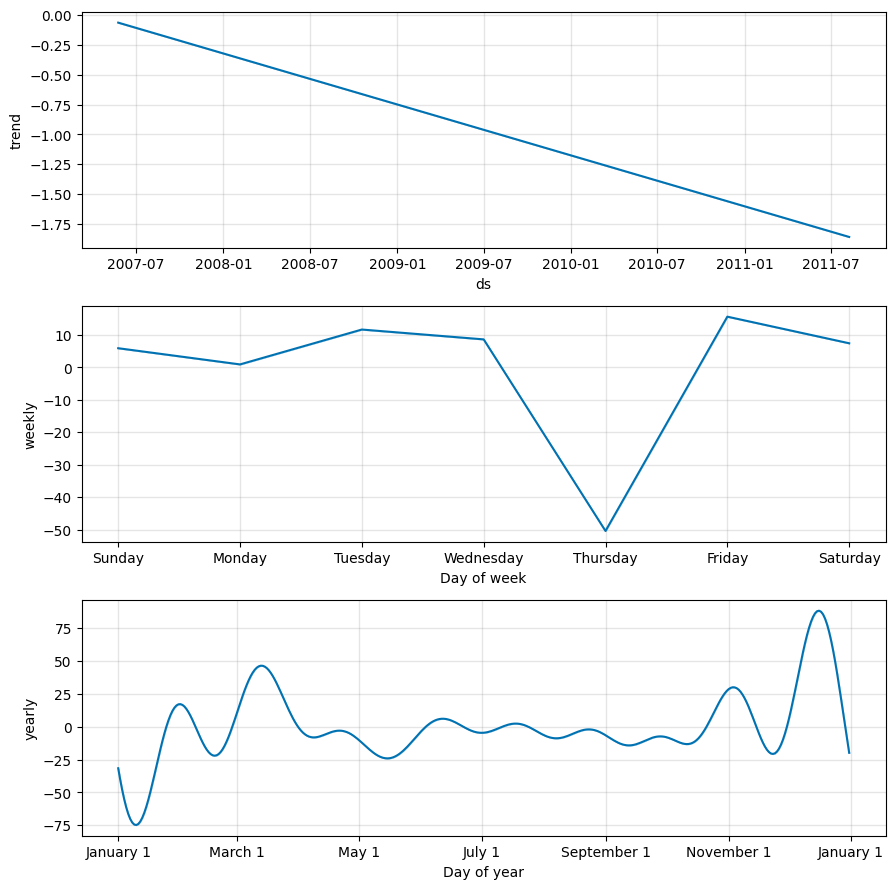

In [8]:
for i in range(len(prophetList)):
    fig1 = prophetList[i].plot_components(forecasts[i])

    

13:51:35 - cmdstanpy - INFO - Chain [1] start processing
13:51:35 - cmdstanpy - INFO - Chain [1] done processing
13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:36 - cmdstanpy - INFO - Chain [1] done processing
13:51:36 - cmdstanpy - INFO - Chain [1] start processing
13:51:37 - cmdstanpy - INFO - Chain [1] done processing


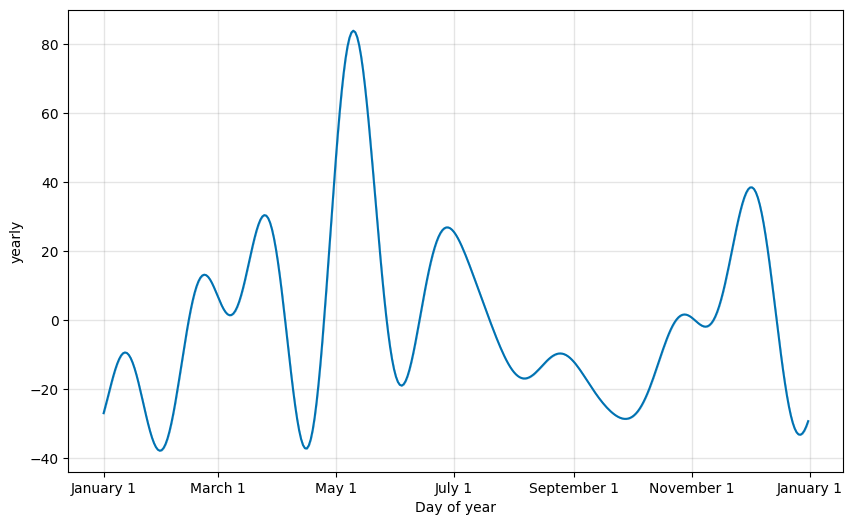

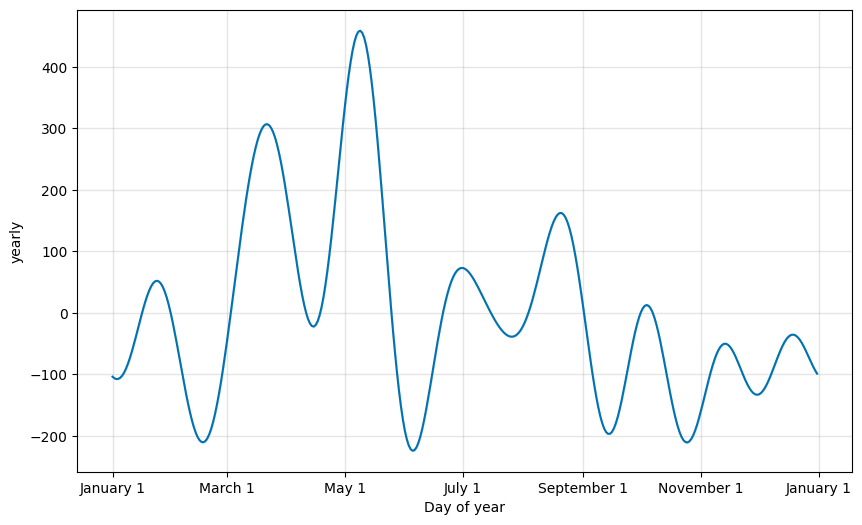

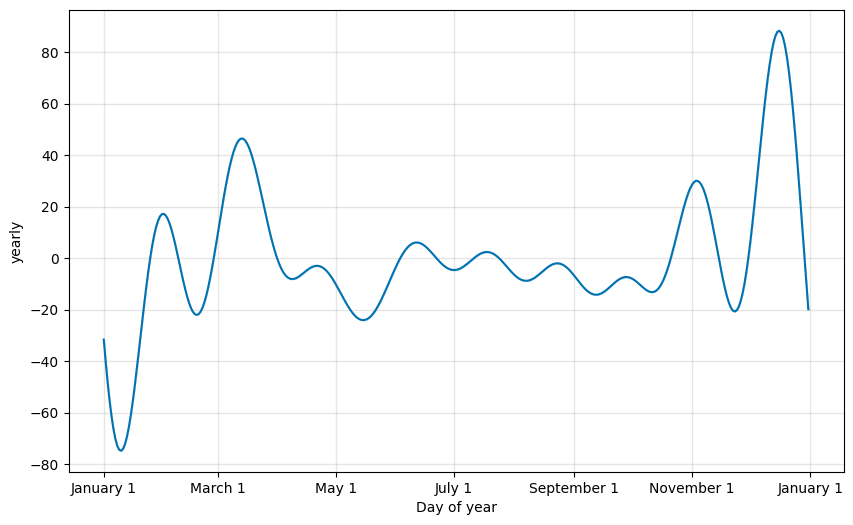

In [9]:
for c in concatenated:
    dataFrame = pd.DataFrame(c)
    p = Prophet().fit(dataFrame)
    a = plot_yearly(p)